# Breast Cancer Prediction
 In this project, I am going to use different machine learning model
 and also a deep learning model to  predict Breast Cancer
 This is a classification problem, since the model outputs benign or malignant.
 31 featutres will be fed to the models, and based on them the models will
make their predictions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import cm as cm
import seaborn as sns # used for plot interactive graph.
from scipy.stats import pearsonr
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Using TensorFlow backend.


# Data Set
Data Set downloaded from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [52]:
# Read the DataSet
df=pd.read_csv("C://Users//data.csv")

In [36]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
df.columns.unique()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Features Visualization

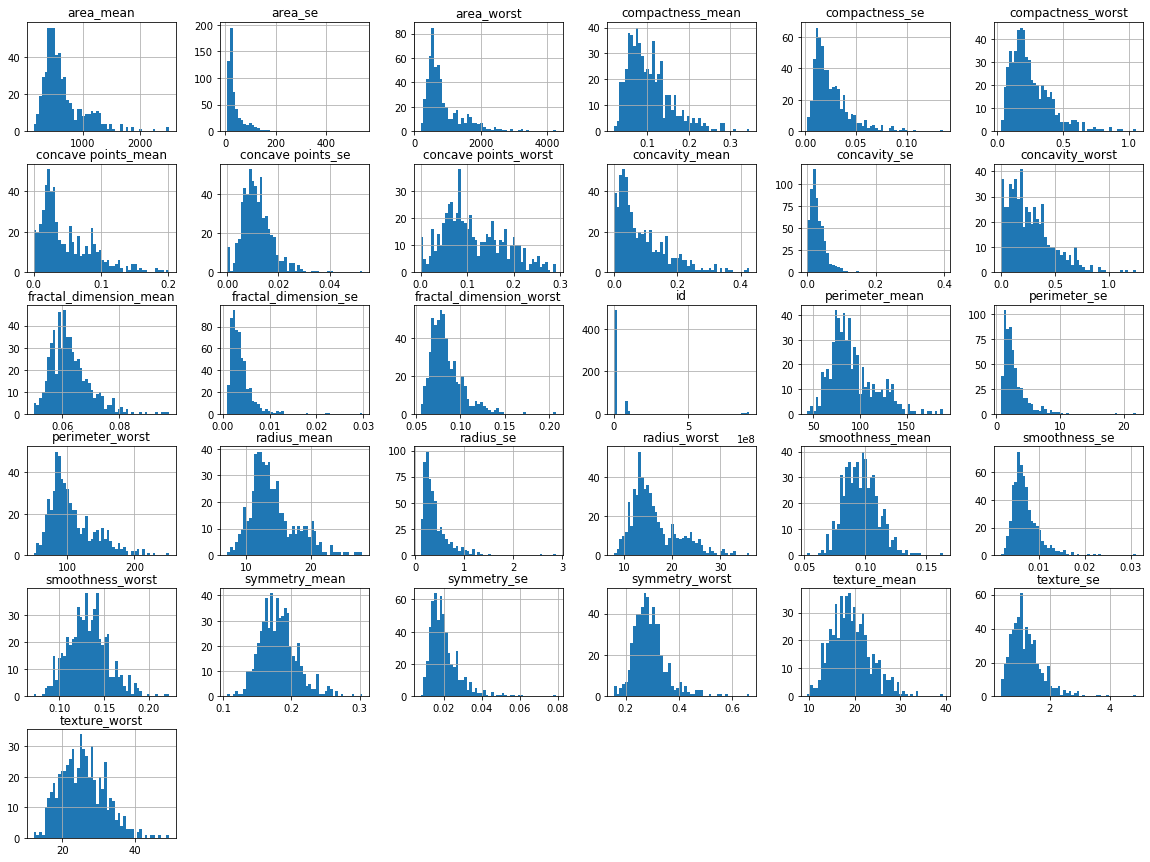

In [39]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Plotting the correlation rate of the features

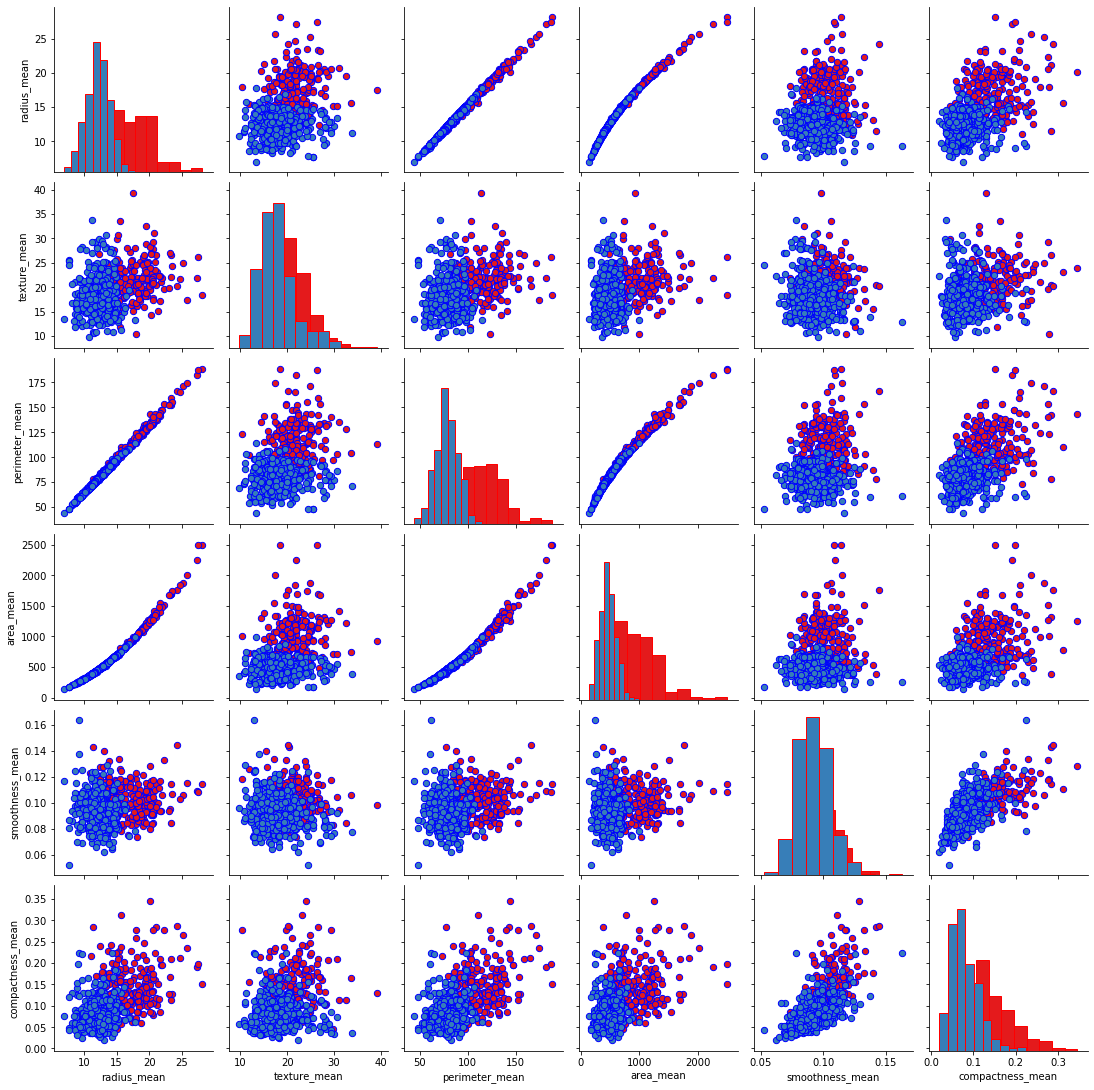

In [40]:
PL = sns.PairGrid(df.iloc[:, 1:8], hue="diagnosis", palette="Set1")
PL = PL.map_diag(plt.hist, edgecolor="r")
PL = PL.map_offdiag(plt.scatter, edgecolor="b", s=40)
plt.show()


# Correlation between features

The less correlated the features are, the more useful they are for classification

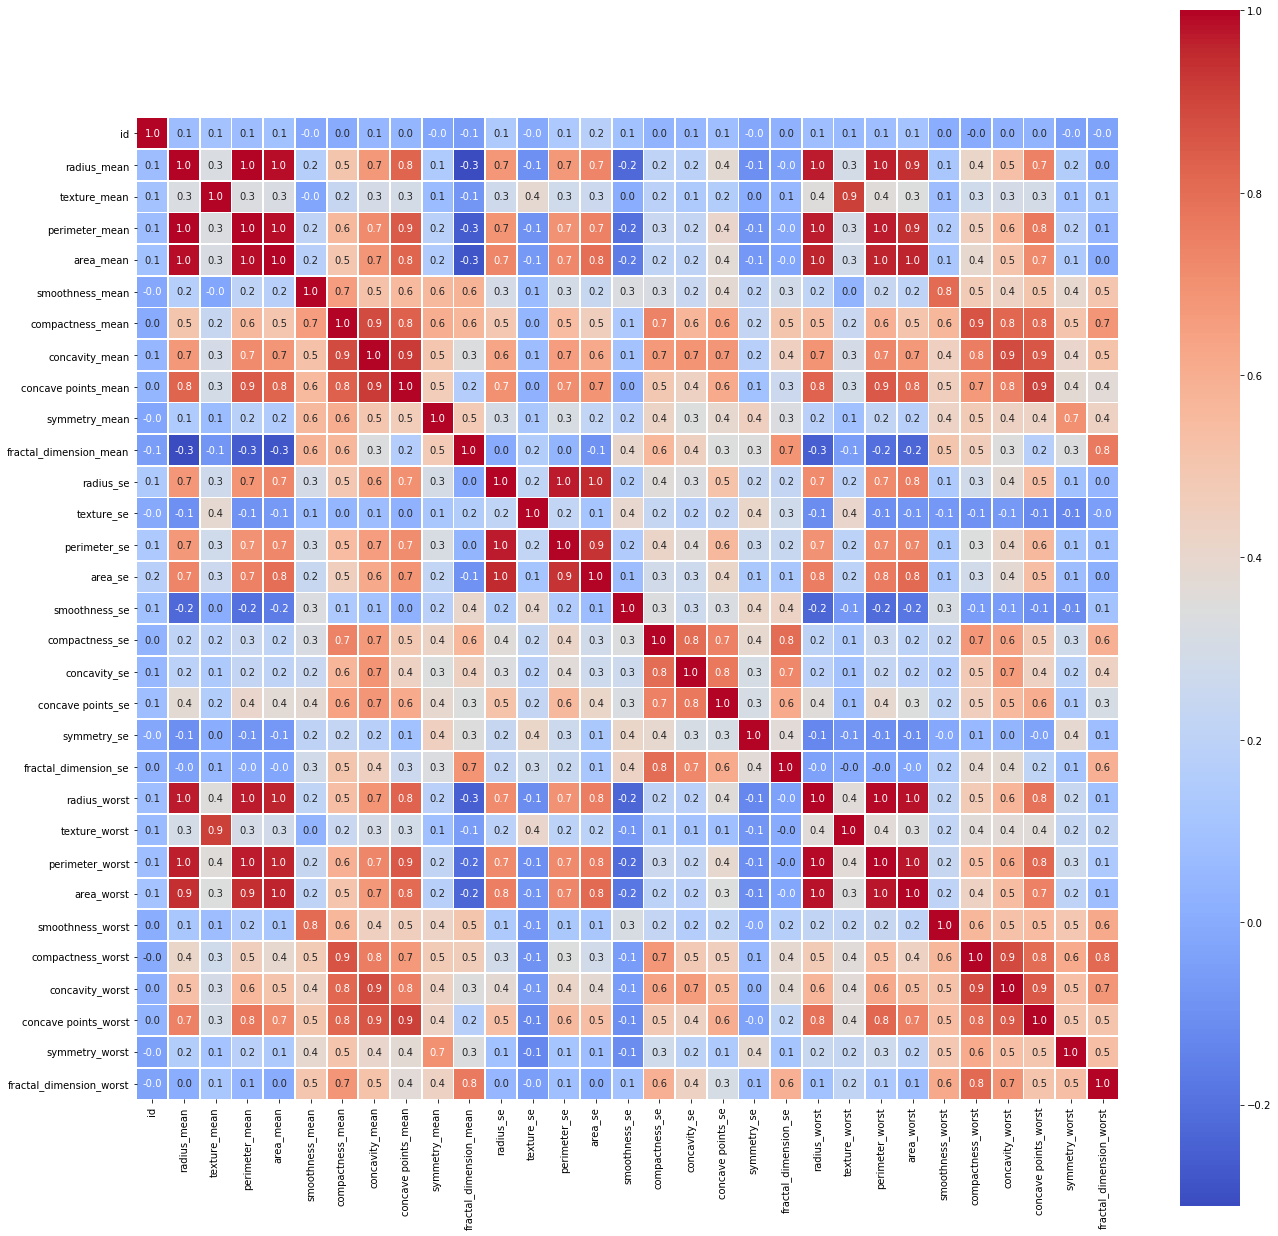

In [41]:
correlation = df.corr() 
f,ax = plt.subplots(figsize=(22, 22))
sns.heatmap(correlation, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.7, ax=ax)


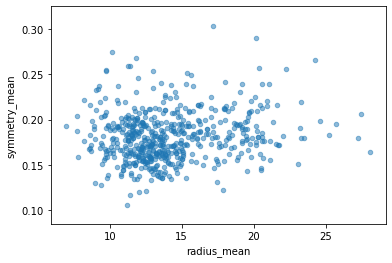

In [42]:
df.plot(kind="scatter", x="radius_mean", y="symmetry_mean",alpha=0.5)


# Data Preperation

In [54]:
# Check to see if there is Null value in DataFrame
df.isnull().values.any()

False

In [55]:
df1=df.copy()

# Finding the degree of correlation between any to arbitrary features using pearsonr library

In [56]:
# Compute Pearson correlation coefficient for 'radius_mean', 'symmetry_mean'
Y = df1.diagnosis
# Mapping Y to 0 and 1
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
df1["diagnosis"]=Y

r1 = pearsonr(df1['perimeter_se'], df1['concavity_worst'])
print("correlation coefficient between'perimeter_se', 'concavity_worst' : {}".format(r1[0]))
r2= pearsonr(df1['texture_se'], df1['concave points_se'])
print("correlation coefficient between'texture_se', 'concave points_se' : {}".format(r2[0]))

#computing corroletaed features with radius_mean
Corr_features = []
for i in (range(1,31)):
        r = pearsonr(df1.iloc[:,2], df1.iloc[:,i])
        #print(r[0])
        if abs(r[0]) >= 0.80 and df1.columns[i]  not in Corr_features:
                    Corr_features.append(df1.columns[i]) 
print()
print('* highly correlated features with radius_mean:', len(Corr_features)) 
print('name_c =',Corr_features)


correlation coefficient between'perimeter_se', 'concavity_worst' : 0.4188988157305723
correlation coefficient between'texture_se', 'concave points_se' : 0.2302833995570333

* highly correlated features with radius_mean: 7
name_c = ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']


# Showing how degree of correlation can affect the classification

Uncorrelated data are poentially more useful: discrimentory!


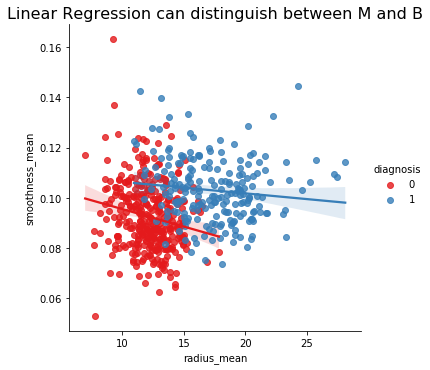

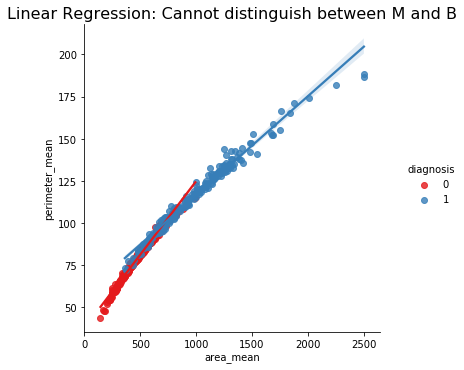

In [58]:
sns.lmplot(x='radius_mean', y= 'smoothness_mean', data = df1, hue ='diagnosis', 
           palette='Set1')
plt.title('Linear Regression can distinguish between M and B', size=16)


sns.lmplot(x='area_mean', y= 'perimeter_mean', data = df1, hue ='diagnosis', 
           palette='Set1')
plt.title('Linear Regression: Cannot distinguish between M and B', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')

# Defining features and labels 
X: Traning features
Y: Target or The lable of the classes (M, B)

In [59]:
X = df.drop(["diagnosis"],axis=1)
Y = df.diagnosis

In [60]:
Y[:4]

0    M
1    M
2    M
3    M
Name: diagnosis, dtype: object

In [61]:
X[:4]

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [62]:
print("Cancer data set dimensions : {}".format(df.shape))
print("label to predict : diagnosis")
print("features to feed a model: rest of the features")

Cancer data set dimensions : (569, 32)
label to predict : diagnosis
features to feed a model: rest of the features


# Standardizing Y 
We need to map the categorical features to numerical values

In [83]:
X = df.drop(["diagnosis"],axis=1)
Y = df.diagnosis
Clarity_dict={"M":1, "B":0}
Y=Y.map(Clarity_dict)
Y[:5]

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [84]:
type(Y)

pandas.core.series.Series

In [71]:
# Second Way

In [72]:
X = df.drop(["diagnosis"],axis=1)
Y = df.diagnosis
# Mapping Y to 0 and 1
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y[:5]

array([1, 1, 1, 1, 1])

In [74]:
df1=df.copy()
df1["diagnosis"]=Y
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Splitting the Data
Splitting data (X, Y) to X_train, X_test, Y_train and Y_test

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# Normalization of features and lables

In [76]:
#normalizing X_train and X_test
StandSc = StandardScaler()
X_train = StandSc.fit_transform(X_train)
X_test = StandSc.transform(X_test)

# Selecting the LogisticRegression as a ML model

In [106]:
classifier = LogisticRegression(random_state = 5)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluate the performance of the model

In [109]:
classifier.score(X_test, Y_test)

0.9649122807017544

In [110]:
Y_pred = classifier.predict(X_test)
Y_pred=pd.DataFrame(Y_pred)
Clar_dict={1:"M", 0:"B"}
Y=Y_pred[0].map(Clar_dict)
Y[:5]


0    M
1    B
2    B
3    B
4    B
Name: 0, dtype: object

In [113]:
seed = 2
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(classifier, X_train, Y_train, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)", (results.mean(), results.std()))


Accuracy: %.3f (%.3f) (0.9798717948717949, 0.027071022084258115)


# Using confusion matrix to find the missclassified items

In [114]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[105,   3],
       [  3,  60]], dtype=int64)

# Different ML models
here we try different ML models to compare their performance

In [129]:
ML_Models = []
ML_Models.append(('Logistic Regression Classifier', LogisticRegression()))
ML_Models.append(('DecisionTree Classifier', DecisionTreeClassifier()))
ML_Models.append(('Support Vector Machine', SVC())) 
ML_Models.append(('Gaussian Naive Baysian Classifier', GaussianNB()))
ML_Models.append(('KNeighbors Classifier', KNeighborsClassifier()))
ML_Models.append(('Random Forest Classifier', RandomForestClassifier()))

In [136]:
from sklearn.model_selection import KFold
import time
from sklearn.model_selection import cross_val_score
num_folds = 10
results = []
names = []

for name, model in ML_Models:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    print( "%s: %f (std: %f) (running time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Logistic Regression Classifier: 0.979872 (std: 0.027071) (run time: 0.063004)
DecisionTree Classifier: 0.919679 (std: 0.026755) (run time: 0.059018)
Support Vector Machine: 0.977436 (std: 0.026108) (run time: 0.033989)
Gaussian Naive Baysian Classifier: 0.937244 (std: 0.032420) (run time: 0.009000)
KNeighbors Classifier: 0.959744 (std: 0.028051) (run time: 0.036999)
Random Forest Classifier: 0.952308 (std: 0.023541) (run time: 1.631001)


# Neural Network with Keras for Brest cancer Detection

In [155]:
NCOLS=X_train.shape[1]

31

In [156]:
features= X_train  
CY_train= to_categorical(Y_train)
n_cols = features.shape[1]

In [157]:
X_train.shape

(398, 31)

In [163]:
model = keras.models.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape = (NCOLS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 
early_stopping_monitor =EarlyStopping(patience=10)

In [164]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               6400      
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                

In [165]:
 
history=model.fit(features, CY_train, validation_split=0.3, epochs=100, batch_size=5,
                  callbacks = [early_stopping_monitor])

Train on 278 samples, validate on 120 samples
Epoch 1/100
278/278 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7518 - val_loss: 0.1588 - val_accuracy: 0.9583
Epoch 2/100
278/278 [==============================] - 0s 385us/step - loss: 0.1872 - accuracy: 0.9353 - val_loss: 0.0759 - val_accuracy: 0.9833
Epoch 3/100
278/278 [==============================] - 0s 367us/step - loss: 0.1333 - accuracy: 0.9604 - val_loss: 0.0525 - val_accuracy: 0.9833
Epoch 4/100
278/278 [==============================] - 0s 363us/step - loss: 0.1377 - accuracy: 0.9604 - val_loss: 0.0440 - val_accuracy: 0.9917
Epoch 5/100
278/278 [==============================] - 0s 327us/step - loss: 0.0961 - accuracy: 0.9640 - val_loss: 0.0366 - val_accuracy: 1.0000
Epoch 6/100
278/278 [==============================] - 0s 349us/step - loss: 0.0811 - accuracy: 0.9748 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 7/100
278/278 [==============================] - 0s 428us/step - loss: 0.0869 - 

In [166]:
y_test= to_categorical(Y_test)

model.evaluate(X_test, y_test)

171/171 [==============================] - 0s 41us/step


[0.1840420924835125, 0.9532163739204407]

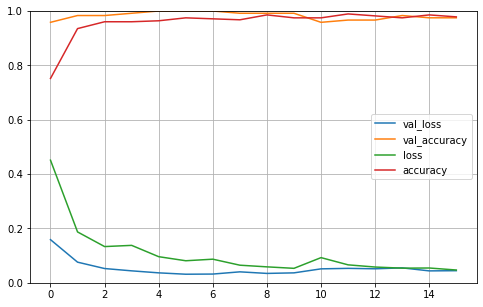

In [167]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
